In [5]:
import numpy as np
import pandas as pd
%config InlineBackend.figure_format='retina'

In [6]:
path = '/Users/apple/Documents/ML_Project/ML - 2.1/result/inverse/2. ws+wd-3.csv'
df = pd.read_csv(path)
df.drop('Unnamed: 0', axis=1, inplace=True)

In [8]:
df.columns

Index(['Y_test', 'default_linear_learner', 'default_tree_learner',
       'lasso_learner', 'linear_svr_learner', 'kernel_ridge_learner',
       'esn_ridge_learner', 'esn_kernel_ridge_learner',
       'esn_linear_svr_learner'],
      dtype='object')

In [23]:
df

Y_test  default_linear_learner
0      15.37              120.638673
1     304.68              195.947693
2     705.66              652.414837
3     150.15              138.203081
4      25.53             -191.854184
...      ...                     ...
3475  601.57              250.622560
3476  842.54              321.450890
3477  442.94              262.976250
3478   56.06             -359.905441
3479    0.00             -822.951355

[3480 rows x 2 columns]

'ws+wd-3'

In [93]:
path = '/Users/apple/Documents/ML_Project/ML - 2.1/result/csv/2. ws+wd-3.csv'
test_len =1000
test_MSE = csv_to_MSE(path, test_len, plot_fig=False, save_fig=False)

In [114]:
import os
path = '/Users/apple/Documents/ML_Project/ML - 2.1/result/csv/'
folder = os.listdir(path)
folder.remove('.DS_Store')
MSE_df = pd.DataFrame()
for file in folder:
    test_MSE = csv_to_MSE(path+file, test_len=1000, plot_fig=False, save_fig=False)
    MSE_df = pd.concat([MSE_df, pd.Series(test_MSE, name=file.split('.csv')[0])], axis=1)

MSE_df.sort_index(axis=1)

02. ws+wd-3  03. ws+wd-6  04. ws+sin(wd)  \
default_linear_learner       0.017703     0.017551        0.012653   
default_tree_learner         0.016483     0.017458        0.017753   
lasso_learner                0.020280     0.020295        0.014368   
linear_svr_learner           0.013618     0.012781        0.013277   
kernel_ridge_learner         0.015419     0.015558        0.013254   
esn_ridge_learner            0.016420     0.016350        0.014193   
esn_kernel_ridge_learner     0.015455     0.015874        0.012657   
esn_linear_svr_learner       0.015482     0.016009        0.012535   

                          08. ws+sin(wd)+cos(wd)  09. ws+sin(wd)+cos(wd)-3  \
default_linear_learner                  0.012644                  0.018025   
default_tree_learner                    0.016786                  0.017940   
lasso_learner                           0.014371                  0.020343   
linear_svr_learner                      0.013556                  0.013784   
kernel_ridge_learner                    0.012968                  0.015594   
esn_ridge_learner                       0.014219                  0.015483   
esn_kernel_ridge_learner                0.012799                  0.016470   
esn_linear_svr_learner                  0.013679                  0.017318   

                          13. ws*sin(wd)+ws*cos(wd)  \
default_linear_learner                     0.037677   
default_tree_learner                       0.016506   
lasso_learner                              0.031934   
linear_svr_learner                         0.037443   
kernel_ridge_learner                       0.012939   
esn_ridge_learner                          0.015494   
esn_kernel_ridge_learner                   0.111531   
esn_linear_svr_learner                     0.036892   

                          14. ws*sin(wd)+ws*cos(wd)-3  
default_linear_learner                       0.021565  
default_tree_learner                         0.017773  
lasso_learner                                0.026368  
linear_svr_learner                           0.023105  
kernel_ridge_learner                         0.018252  
esn_ridge_learner                            0.018091  
esn_kernel_ridge_learner                     0.019457  
esn_linear_svr_learner                       0.021484

In [140]:
from sklearn.metrics import mean_squared_error
def csv_to_MSE(path, test_len='auto', plot_fig=False, save_fig=False, add_model_title=True, 
               save_path='/Users/apple/Documents/ML_Project/ML - 2.1/figure/'):
    df = pd.read_csv(path, index_col=0)
    if test_len=='auto':
        test_len=len(df)
    df = df.iloc[:test_len]
    MSE_dict={}
    for i in np.arange(1,len(df.columns)):
        Y_test = df['Y_test']
        Y_preds = df[df.columns[i]]
        test_MSE = mean_squared_error(Y_preds, Y_test)
        MSE_dict.update({df.columns[i]:test_MSE})
#         print('Model: {} \n  MSE: {}'.format(df.columns[i], round(test_MSE,4)))
        
        if plot_fig:
            if add_model_title:
                title='Input: '+path.split('/')[-1].split('. ')[1].split('.')[0]+\
                '   MSE:{}'.format(round(test_MSE,4))
            else:
                title='  MSE:{}'.format(round(test_MSE,4))
           # test Mean Squared Error
            pd.concat([Y_test, Y_preds], axis=1).plot(figsize=(10,4), title=title)    
            pd.Series(np.zeros(len(df)), index=df.index).plot(color='k')
            if save_fig:
                plt.savefig(save_path+df.columns[i])
                print('  Save figue in'+save_path)
    return MSE_dict

In [187]:
def csv_to_heatmap(path, figsize=(15,8), vmin=0.01, vmax=0.04,
                   save_path='/Users/apple/Documents/ML_Project/ML - 2.1/result/csv_to_heatmap.png'):
    if path.split('.')[-1]=='csv':
        df = pd.read_csv(path, index_col=0)
    elif path.split('.')[-1]=='xlsx':
        df = pd.read_excel(path, index_col=0)
        
    f, ax= plt.subplots(figsize=figsize,nrows=1)
    if vmax>0.03:
        sns.heatmap(df, ax=ax, vmin=vmin, vmax=vmax, annot=True, fmt='.3f')
    else:
        sns.heatmap(df, ax=ax, vmin=vmin, vmax=vmax, annot=True, fmt='.4f')
    plt.xticks(rotation=20) 
    plt.savefig(save_path, dpi=300)

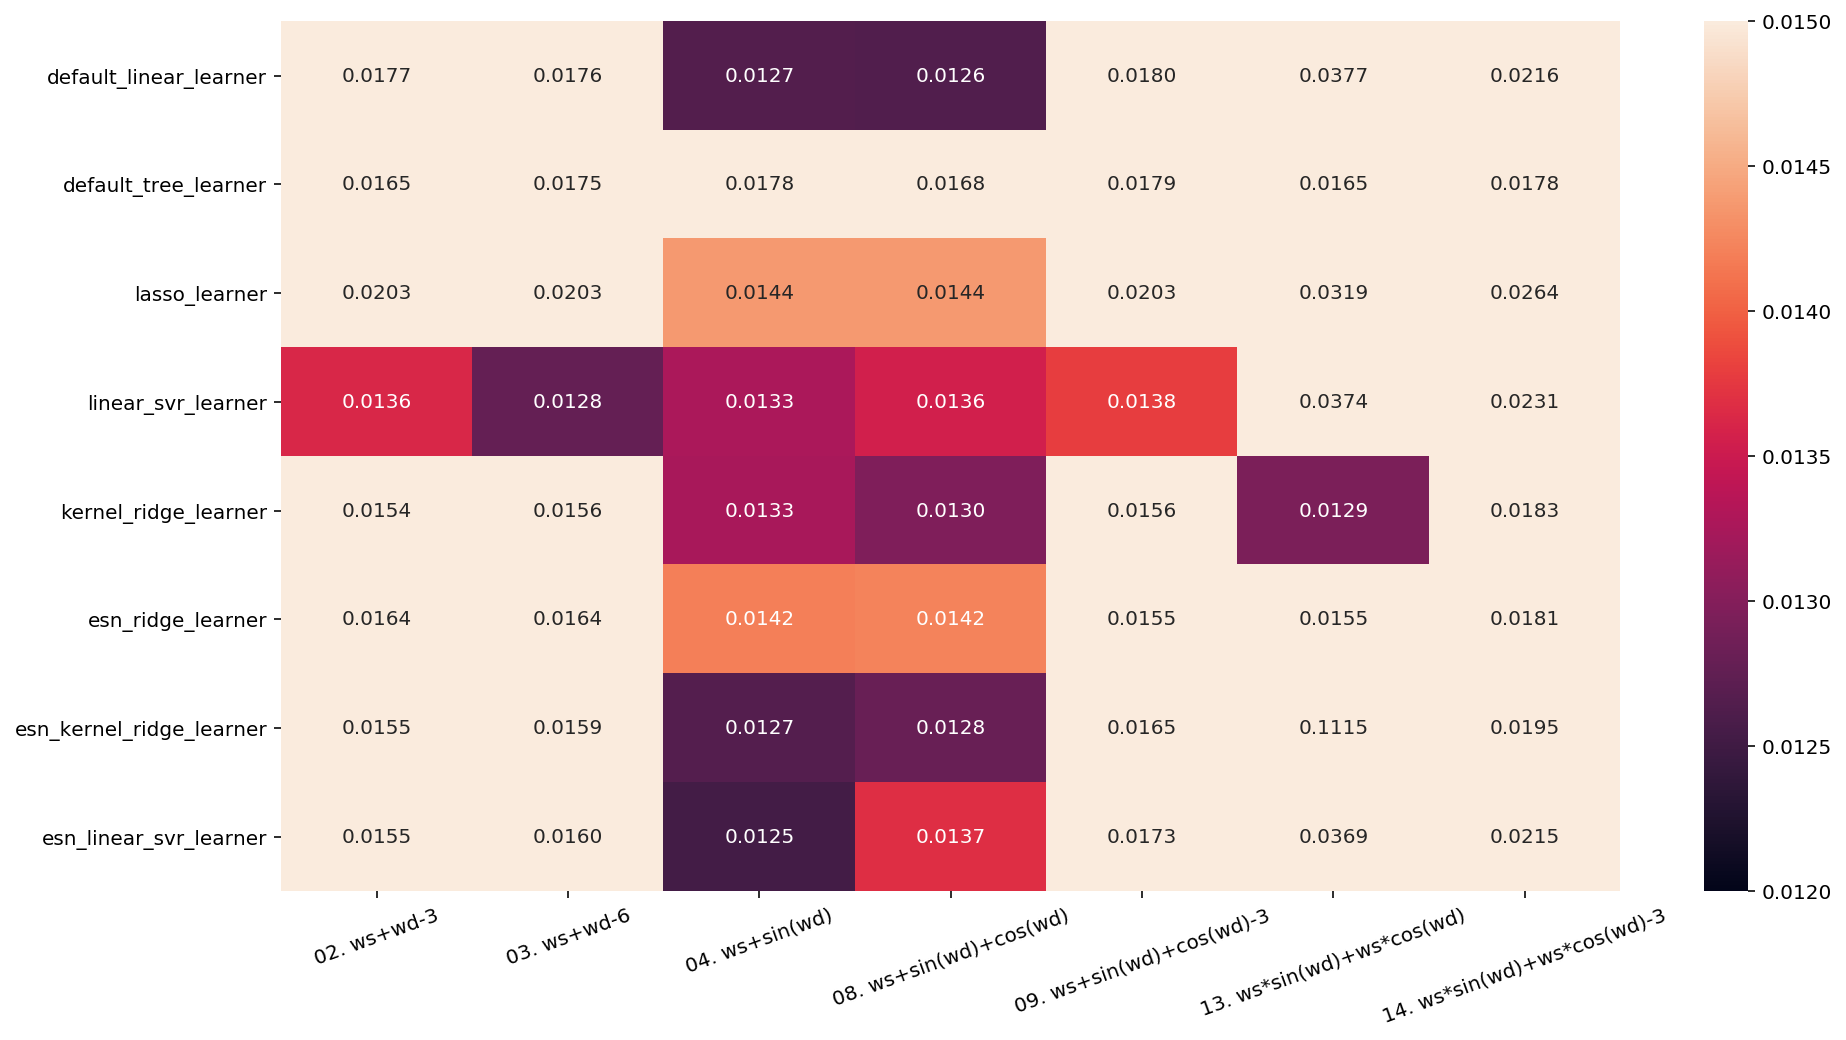

In [188]:
csv_to_heatmap(path='/Users/apple/Documents/ML_Project/ML - 2.1/result/MSE with len 1000.csv',
              vmin=0.012, vmax=0.015)

In [189]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
def csvs_to_MSE(test_len='auto', save_file=True, plot_figure=True, figsize=(15,8), vmin=0.01, vmax=0.04,
                path='/Users/apple/Documents/ML_Project/ML - 2.1/result/csv/',
                save_path='/Users/apple/Documents/ML_Project/ML - 2.1/result/'):
    folder = os.listdir(path)
    folder.remove('.DS_Store')
    MSE_df = pd.DataFrame()
    for file in folder:
        test_MSE = csv_to_MSE(path+file, test_len=test_len, plot_fig=False, save_fig=False)
        MSE_df = pd.concat([MSE_df, pd.Series(test_MSE, name=file.split('.csv')[0])], axis=1)
    MSE_df = MSE_df.sort_index(axis=1)
    if save_file:
        MSE_df.to_csv(save_path+'MSE with len {}.csv'.format(test_len))
    if plot_figure:
        csv_to_heatmap(path=save_path+'MSE with len {}.csv'.format(test_len),
                       figsize=figsize, vmin=vmin, vmax=vmax,
                       save_path=save_path+'MSE with len {}.png'.format(test_len))
    return MSE_df

TypeError: float() argument must be a string or a number, not 'builtin_function_or_method'

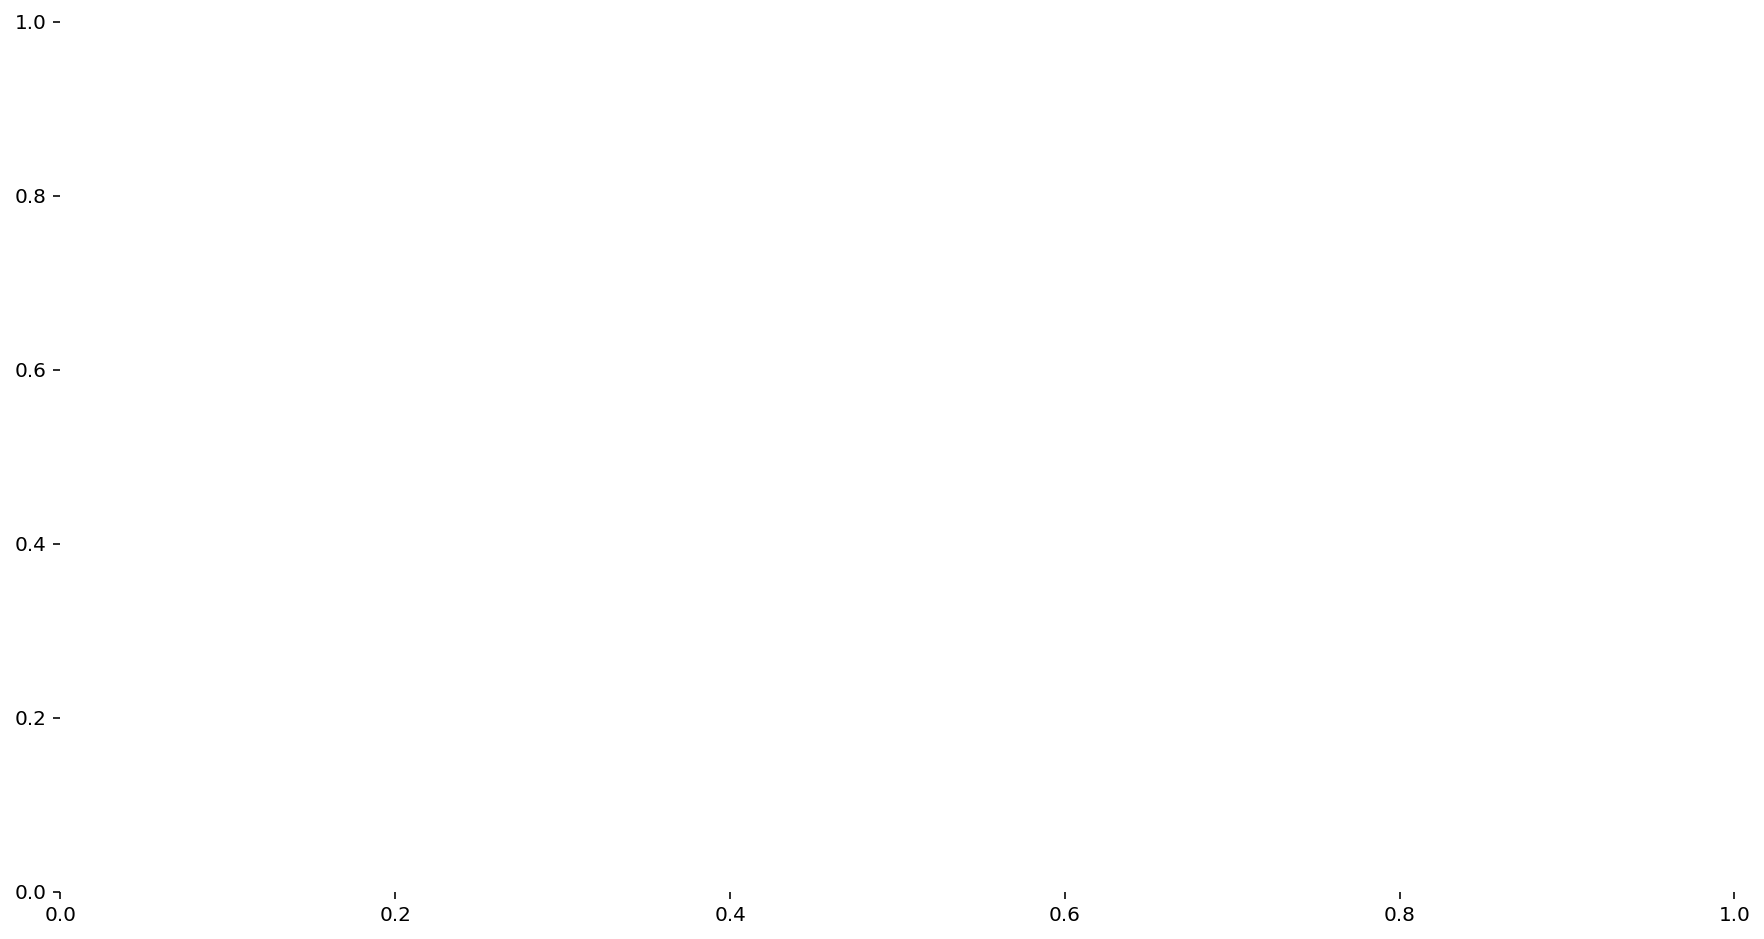

In [191]:
%config InlineBackend.figure_format='retina'
csvs_to_MSE(path='/Users/apple/Documents/ML_Project/ML - 2.1/result/csv/', 
            save_file=True, plot_figure=True)